In [ ]:
!pip install scikit-plot

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from scikitplot.metrics import plot_confusion_matrix
import numpy as np

from sklearn.svm import SVC

In [ ]:
# loading CIFAR10 dataset
(image_data_train, image_label_train), (image_data_test, image_label_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
max_limit = 5000

In [ ]:
# Flat and scale images
image_data_train_flat = image_data_train[:max_limit].reshape(max_limit, -1) / 255.0
image_data_test_flat = image_data_test.reshape(image_data_test.shape[0], -1) / 255.0

In [ ]:
# flatten labels
image_label_train_flat = image_label_train[:max_limit].flatten()
image_label_test_flat = image_label_test.flatten()

In [ ]:
#Train test split
image_data_train_split, image_data_validation_split, image_label_train_split, image_label_validation_split = train_test_split(
    image_data_train_flat, image_label_train_flat, test_size=0.2, random_state=42)

In [ ]:
# Scale data
normaliser = StandardScaler()
image_data_train_scaled = normaliser.fit_transform(image_data_train_split)
image_data_validation_scaled = normaliser.transform(image_data_validation_split)
image_data_test_scaled = normaliser.transform(image_data_test_flat)

In [ ]:
clf = SVC()
clf.fit(image_data_train_scaled, image_label_train_split)

SVC()

In [ ]:
# Evaluate the model on the validation set
validation_accuracy = clf.score(image_data_validation_scaled, image_label_validation_split)
print(f"Support Vector Machine Validation Accuracy: {validation_accuracy}")

# Evaluate the model on the test set
test_accuracy = clf.score(image_data_test_scaled, image_label_test_flat)
print(f"Support Vector Machine Test Accuracy: {test_accuracy:}")

Support Vector Machine Validation Accuracy: 0.432
Support Vector Machine Test Accuracy: 0.4297


In [ ]:
# Evaluate the model on the test set
image_label_prediction_svc = clf.predict(image_data_test_scaled[:10000])

***ImplementationForCNN***

In [ ]:
from tensorflow.keras import layers, models

In [ ]:
# Normalize pixel values to be between 0 and 1
x_train_normalized = image_data_train[:max_limit] / 255.0
x_test_normalized = image_data_test / 255.0

In [ ]:
# Split the subset into training and testing sets
image_data_train_split, image_data_validation_split, image_label_train_split, image_label_validation_split = train_test_split(
    x_train_normalized, image_label_train[:max_limit], test_size=0.2, random_state=42
)

In [ ]:
# Define the CNN cnn_model
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dense(10, activation='softmax'))

In [ ]:
# Compile the model
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = cnn_model.fit(image_data_train_split, image_label_train_split, epochs=10, validation_data=(image_data_validation_split, image_label_validation_split))

Epoch 1/10
125/125 [==============================] - 7s 41ms/step - loss: 2.1674 - accuracy: 0.1705 - val_loss: 1.9174 - val_accuracy: 0.2850
Epoch 2/10
125/125 [==============================] - 5s 39ms/step - loss: 1.8670 - accuracy: 0.3155 - val_loss: 1.7067 - val_accuracy: 0.3630
Epoch 3/10
125/125 [==============================] - 6s 48ms/step - loss: 1.6806 - accuracy: 0.3873 - val_loss: 1.6189 - val_accuracy: 0.3960
Epoch 4/10
125/125 [==============================] - 4s 36ms/step - loss: 1.5526 - accuracy: 0.4363 - val_loss: 1.5553 - val_accuracy: 0.4030
Epoch 5/10
125/125 [==============================] - 5s 38ms/step - loss: 1.4701 - accuracy: 0.4683 - val_loss: 1.4441 - val_accuracy: 0.4660
Epoch 6/10
125/125 [==============================] - 6s 45ms/step - loss: 1.3842 - accuracy: 0.5128 - val_loss: 1.4165 - val_accuracy: 0.4870
Epoch 7/10
125/125 [==============================] - 5s 36ms/step - loss: 1.2908 - accuracy: 0.5295 - val_loss: 1.4585 - val_accuracy: 0.4730

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = cnn_model.evaluate(x_test_normalized, image_label_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 [==============================] - 5s 16ms/step - loss: 1.4387 - accuracy: 0.5016
Test Accuracy: 0.5016


Accuracy Graph CNN

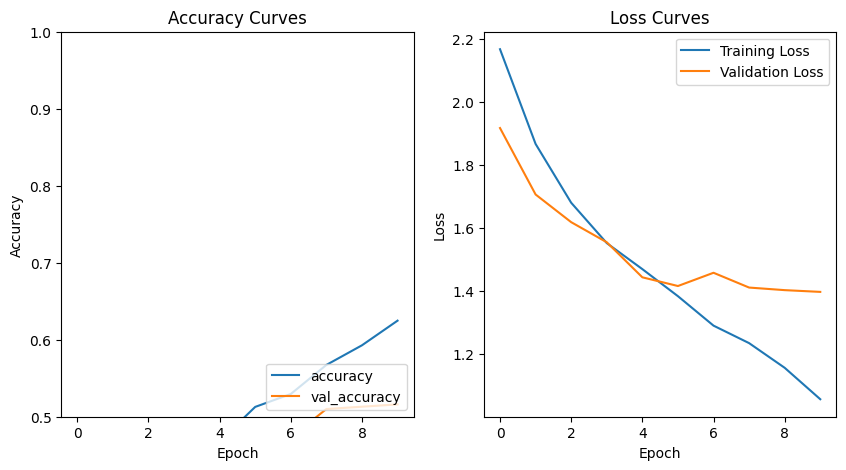

In [ ]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

CNN Confusion Matrix:

313/313 [==============================] - 5s 16ms/step


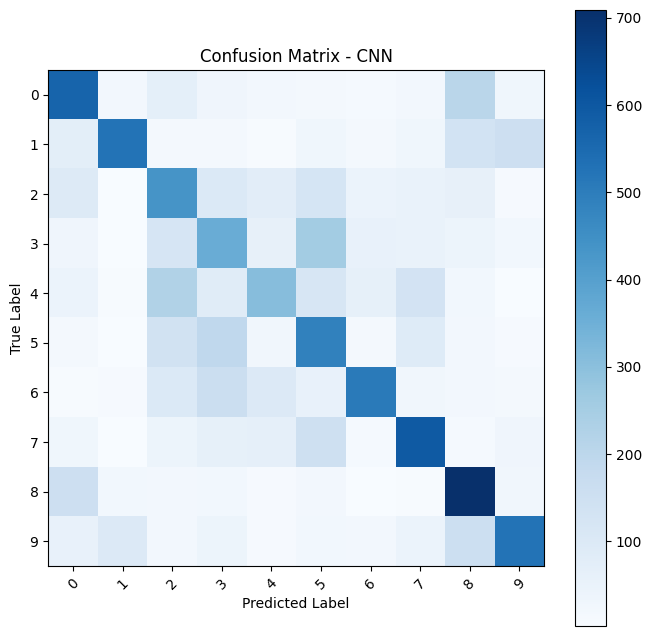

In [ ]:
# Evaluate the model on the test set
image_label_prediction = np.argmax(cnn_model.predict(x_test_normalized), axis=1)

# Generate and plot the confusion matrix
confusion_matrix_cnn = confusion_matrix(image_label_test.flatten(), image_label_prediction)
plt.figure(figsize=(8, 8))
plt.imshow(confusion_matrix_cnn, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - CNN')
plt.colorbar()

# Set tick marks for classes
classes = np.unique(image_label_test.flatten())
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()